# Expression Quality Control (Part 2)

This is a template notebook for performing the final quality control on your organism's expression data. This requires a curated metadata sheet.

## Setup 

In [3]:
import itertools

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from os import path
from scipy import stats
from tqdm.notebook import tqdm

In [4]:
sns.set_style('ticks')

### Inputs

In [37]:
#logTPM_file = path.join('..','data','5g_processed_data','log_norm_uMax_indiv.csv') # Enter log-TPM filename here
logTPM_file = path.join('..','data','5g_processed_data','log_norm_uMax_indiv_lowExAdj_15.csv') # Enter log-TPM filename here
all_metadata_file = path.join('..','data','5g_processed_data','5G_exp_metadata_coded.tsv') # Enter full metadata filename here
metadata_file = path.join('..','data','5g_processed_data','final_meta.tsv') # Enter curated metadata filename here

### Load expression data

In [38]:
DF_log_tpm = pd.read_csv(logTPM_file,index_col=0).fillna(0)
print('Number of genes:',DF_log_tpm.shape[0])
print('Number of samples:',DF_log_tpm.shape[1])
DF_log_tpm.head()

Number of genes: 4213
Number of samples: 86


,5GB1_FM03_TR1_QC_tpm,5GB1_FM03_TR2_QC_tpm,5GB1_FM11_TR1_QC_tpm,5GB1_FM11_TR2_QC_tpm,5GB1_FM12_TR1_tpm,5GB1_FM12_TR1_QC_tpm,5GB1_FM12_TR2_tpm,5GB1_FM12_TR2_QC_tpm,5GB1_FM14_TR1_tpm,5GB1_FM14_TR1_QC_tpm,...,5GB1_pA9_red_tpm,5GB1_pA9_yellow_tpm,5GB1C-5G-La-BR1_tpm,5GB1C-5G-La-BR2_tpm,5GB1C-5G-N-BR1_tpm,5GB1C-5G-N-BR2_tpm,5GB1C-JG15-La-BR1_tpm,5GB1C-JG15-La-BR2_tpm,5GB1C-JG15-N-BR1_tpm,5GB1C-JG15-N-BR2_tpm
locus_tag,,,,,,,,,,,,,,,,,,,,,
EQU24_RS00005,-0.081618,0.013543,-1.005473,-0.565908,-0.868240,-0.861181,-0.860286,-0.810841,-0.466774,-0.532657,...,-0.423331,-0.413887,-0.465584,-0.361508,-0.366746,-0.629039,-0.374679,-0.430905,-0.773416,-0.326023
EQU24_RS00010,-0.213951,-0.115316,-0.677320,-0.569877,-1.119576,-1.054664,-1.167149,-1.149678,-0.423026,-0.491606,...,-0.179590,-0.182090,-0.479849,-0.274384,-0.346861,-0.306024,-0.388553,-0.356148,-0.679766,-0.170025
EQU24_RS00015,0.002850,-0.174656,-0.639651,-0.279816,-1.029608,-1.120098,-1.028006,-0.996256,-0.586234,-0.612814,...,-0.110156,0.045097,-0.655508,-0.483245,-0.609796,-0.620538,-0.578460,-0.572416,-0.801799,-0.181680
EQU24_RS00020,-0.130356,0.040745,-0.414605,-0.346534,-0.941858,-0.957353,-0.913985,-0.980052,-0.512366,-0.460317,...,0.082403,0.193677,-0.363136,-0.123069,-0.244925,-0.128927,-0.032470,-0.106898,-0.295688,-0.049523
EQU24_RS00025,0.659048,0.404700,-0.031390,0.291903,-0.787794,-0.640604,-0.818610,-0.839456,-0.307450,-0.396271,...,0.087352,0.059120,-0.455537,-0.375085,-0.325837,-0.267183,-0.280655,-0.400990,-0.192058,-0.235679


In [39]:
no_tx_genes1 = ['EQU24_RS00625',
 'EQU24_RS00630',
 'EQU24_RS00635',
 'EQU24_RS00640',
 'EQU24_RS00645',
 'EQU24_RS01445',
 'EQU24_RS02735',
 'EQU24_RS02740',
 'EQU24_RS02745',
 'EQU24_RS02750',
 'EQU24_RS02755',
 'EQU24_RS03465',
 'EQU24_RS03550',
 'EQU24_RS04130',
 'EQU24_RS04230',
 'EQU24_RS05785',
 'EQU24_RS06860',
 'EQU24_RS07485',
 'EQU24_RS08045',
 'EQU24_RS08835',
 'EQU24_RS08845',
 'EQU24_RS08860',
 'EQU24_RS09300',
 'EQU24_RS09560',
 'EQU24_RS11380',
 'EQU24_RS12090',
 'EQU24_RS12810',
 'EQU24_RS12825',
 'EQU24_RS16040',
 'EQU24_RS16985',
 'EQU24_RS18835',
 'EQU24_RS18840',
 'EQU24_RS18845',
 'EQU24_RS18850',
 'EQU24_RS18855',
 'EQU24_RS19655',
 'EQU24_RS20615',
 'EQU24_RS21585',
 'EQU24_RS21590',
 'EQU24_RS21600',
 'EQU24_RS21605',
 'EQU24_RS21615',
 'EQU24_RS21620']

In [40]:
DF_log_tpm[DF_log_tpm.index.isin(no_tx_genes1)]

,5GB1_FM03_TR1_QC_tpm,5GB1_FM03_TR2_QC_tpm,5GB1_FM11_TR1_QC_tpm,5GB1_FM11_TR2_QC_tpm,5GB1_FM12_TR1_tpm,5GB1_FM12_TR1_QC_tpm,5GB1_FM12_TR2_tpm,5GB1_FM12_TR2_QC_tpm,5GB1_FM14_TR1_tpm,5GB1_FM14_TR1_QC_tpm,...,5GB1_pA9_red_tpm,5GB1_pA9_yellow_tpm,5GB1C-5G-La-BR1_tpm,5GB1C-5G-La-BR2_tpm,5GB1C-5G-N-BR1_tpm,5GB1C-5G-N-BR2_tpm,5GB1C-JG15-La-BR1_tpm,5GB1C-JG15-La-BR2_tpm,5GB1C-JG15-N-BR1_tpm,5GB1C-JG15-N-BR2_tpm
locus_tag,,,,,,,,,,,,,,,,,,,,,
EQU24_RS00625,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
EQU24_RS00630,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
EQU24_RS00635,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
EQU24_RS00640,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
EQU24_RS00645,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
EQU24_RS01445,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
EQU24_RS02735,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
EQU24_RS02740,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
EQU24_RS02745,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Load metadata

In [10]:
DF_metadata = pd.read_csv(metadata_file,sep='\t')
print('Number of samples with curated metadata:',DF_metadata.shape[0])
DF_metadata.head()

Number of samples with curated metadata: 86


,sample_id,exp_theme,exp_condition,sample,shortd,longd,carbon_source,oxygen_level,nitrate_level,copper_level,lanthanum_level,growth_rate,growth_mode,include?,notes,cluster_id,project,condition,reference_condition,xorder
0,5GB1_FM03_TR1_QC_tpm,uMax,uMax,5GB1_FM03_TR1_QC,uMax_QC,"Fermentor run 3, uMax though close to O2 limit...",2,1,0,3,0,2,0,1,NaN,1,5G,uMax,uMax,uMax
1,5GB1_FM20_TR3_tpm,uMax,uMax,5GB1_FM20_TR3,uMax,"Fermentor run 20, uMax",2,1,0,3,0,2,0,1,NaN,9,5G,uMax,uMax,uMax
2,5GB1_FM20_TR3_QC_tpm,uMax,uMax,5GB1_FM20_TR3_QC,uMax_QC,"Fermentor run 20, uMax, QC",2,1,0,3,0,2,0,1,NaN,4,5G,uMax,uMax,uMax
3,5GB1_FM20_TR3_UW_tpm,uMax,uMax,5GB1_FM20_TR3_UW,uMax,"Fermentor run 20, uMax",2,1,0,3,0,2,0,1,NaN,10,5G,uMax,uMax,uMax
4,5GB1_FM20_TR2_QC_tpm,uMax,uMax,5GB1_FM20_TR2_QC,uMax_QC,"Fermentor run 20, uMax",2,1,0,3,0,2,0,1,NaN,3,5G,uMax,uMax,uMax


In [11]:
DF_metadata_all = pd.read_csv(all_metadata_file,sep='\t')

## Remove samples due to poor metadata

After curation, some samples either did not have enough replicates or metadata to warrant inclusion in this database.

In [12]:
DF_metadata_passed_step4 = DF_metadata#[~DF_metadata.skip.fillna(False)].copy()
print('New number of samples with curated metadata:',DF_metadata_passed_step4.shape[0])
DF_metadata_passed_step4.head()

New number of samples with curated metadata: 86


,sample_id,exp_theme,exp_condition,sample,shortd,longd,carbon_source,oxygen_level,nitrate_level,copper_level,lanthanum_level,growth_rate,growth_mode,include?,notes,cluster_id,project,condition,reference_condition,xorder
0,5GB1_FM03_TR1_QC_tpm,uMax,uMax,5GB1_FM03_TR1_QC,uMax_QC,"Fermentor run 3, uMax though close to O2 limit...",2,1,0,3,0,2,0,1,NaN,1,5G,uMax,uMax,uMax
1,5GB1_FM20_TR3_tpm,uMax,uMax,5GB1_FM20_TR3,uMax,"Fermentor run 20, uMax",2,1,0,3,0,2,0,1,NaN,9,5G,uMax,uMax,uMax
2,5GB1_FM20_TR3_QC_tpm,uMax,uMax,5GB1_FM20_TR3_QC,uMax_QC,"Fermentor run 20, uMax, QC",2,1,0,3,0,2,0,1,NaN,4,5G,uMax,uMax,uMax
3,5GB1_FM20_TR3_UW_tpm,uMax,uMax,5GB1_FM20_TR3_UW,uMax,"Fermentor run 20, uMax",2,1,0,3,0,2,0,1,NaN,10,5G,uMax,uMax,uMax
4,5GB1_FM20_TR2_QC_tpm,uMax,uMax,5GB1_FM20_TR2_QC,uMax_QC,"Fermentor run 20, uMax",2,1,0,3,0,2,0,1,NaN,3,5G,uMax,uMax,uMax


### Check curation
Since manual curation is error-prone, we want to make sure that all samples have labels for their project and condition. In addition, there should only be one reference condition in each project, and it should be in the project itself.

Any samples that fail these checks will be printed below.

In [13]:
assert(DF_metadata_passed_step4.project.notnull().all())
assert(DF_metadata_passed_step4.condition.notnull().all())

for name,group in DF_metadata_passed_step4.groupby('project'):
    ref_cond = group.reference_condition.unique()
    
    # Ensure that there is only one reference condition per project
    if not len(ref_cond) == 1:
        print('Multiple reference conditions for:, name')
    
    # Ensure the reference condition is in fact in the project
    ref_cond = ref_cond[0]
    if not ref_cond in group.condition.tolist():
        print('Reference condition not in project:', name)

Next, make a new column called ``full_name`` that gives every experimental condition a unique, human-readable identifier.

In [14]:
DF_metadata_passed_step4['full_name'] = DF_metadata_passed_step4['project'].str.cat(DF_metadata_passed_step4['condition'],sep=':')

In [15]:
DF_metadata_passed_step4

,sample_id,exp_theme,exp_condition,sample,shortd,longd,carbon_source,oxygen_level,nitrate_level,copper_level,...,growth_rate,growth_mode,include?,notes,cluster_id,project,condition,reference_condition,xorder,full_name
0,5GB1_FM03_TR1_QC_tpm,uMax,uMax,5GB1_FM03_TR1_QC,uMax_QC,"Fermentor run 3, uMax though close to O2 limit...",2,1,0,3,...,2,0,1,NaN,1,5G,uMax,uMax,uMax,5G:uMax
1,5GB1_FM20_TR3_tpm,uMax,uMax,5GB1_FM20_TR3,uMax,"Fermentor run 20, uMax",2,1,0,3,...,2,0,1,NaN,9,5G,uMax,uMax,uMax,5G:uMax
2,5GB1_FM20_TR3_QC_tpm,uMax,uMax,5GB1_FM20_TR3_QC,uMax_QC,"Fermentor run 20, uMax, QC",2,1,0,3,...,2,0,1,NaN,4,5G,uMax,uMax,uMax,5G:uMax
3,5GB1_FM20_TR3_UW_tpm,uMax,uMax,5GB1_FM20_TR3_UW,uMax,"Fermentor run 20, uMax",2,1,0,3,...,2,0,1,NaN,10,5G,uMax,uMax,uMax,5G:uMax
4,5GB1_FM20_TR2_QC_tpm,uMax,uMax,5GB1_FM20_TR2_QC,uMax_QC,"Fermentor run 20, uMax",2,1,0,3,...,2,0,1,NaN,3,5G,uMax,uMax,uMax,5G:uMax
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81,5GB1_LTrecycle_TR1_QC_tpm,LanzaTech,LanzaTech,5GB1_LTrecycle_TR1_QC,LTrecycle_QC,LanzaTech Cell recycle,-1,-1,-1,-1,...,-1,-1,1,other exp,18,5G,LanzaTech,uMax,NaN,5G:LanzaTech
82,5GB1_FM_85_TR1_tpm,aa3_KO,aa3_KO,5GB1_FM_85_TR1,5GB1_FM_85,Fermentor run 85,2,1,0,3,...,2,0,1,other exp,14,5G,aa3_KO,uMax,NaN,5G:aa3_KO
83,5GB1_FM_85_TR2_tpm,aa3_KO,aa3_KO,5GB1_FM_85_TR2,5GB1_FM_85,Fermentor run 85,2,1,0,3,...,2,0,1,other exp,14,5G,aa3_KO,uMax,NaN,5G:aa3_KO
84,5GB1_pA9_red_tpm,crotonic_acid,crotonic_acid,5GB1_pA9_red,5GB1_pA9,Vial sample producing crotonic acid,2,1,0,3,...,2,1,1,other exp,13,5G,crotonic_acid,uMax,NaN,5G:crotonic_acid


### Remove samples with only one replicate

First, find sample names that have at least two replicates.

In [16]:
counts = DF_metadata_passed_step4.full_name.value_counts()
keep_samples = counts[counts >= 2].index
print(keep_samples[:5])

Index(['5G:uMax', '5G:lowO2_fast_growth', '5G:lowCu', '5G:lowCH4', '5G:MeOH'], dtype='object')


Only keep these samples

In [17]:
DF_metadata_passed_step4 = DF_metadata_passed_step4[DF_metadata_passed_step4.full_name.isin(keep_samples)]
print('New number of samples with curated metadata:',DF_metadata_passed_step4.shape[0])
DF_metadata_passed_step4.head()

New number of samples with curated metadata: 86


,sample_id,exp_theme,exp_condition,sample,shortd,longd,carbon_source,oxygen_level,nitrate_level,copper_level,...,growth_rate,growth_mode,include?,notes,cluster_id,project,condition,reference_condition,xorder,full_name
0,5GB1_FM03_TR1_QC_tpm,uMax,uMax,5GB1_FM03_TR1_QC,uMax_QC,"Fermentor run 3, uMax though close to O2 limit...",2,1,0,3,...,2,0,1,NaN,1,5G,uMax,uMax,uMax,5G:uMax
1,5GB1_FM20_TR3_tpm,uMax,uMax,5GB1_FM20_TR3,uMax,"Fermentor run 20, uMax",2,1,0,3,...,2,0,1,NaN,9,5G,uMax,uMax,uMax,5G:uMax
2,5GB1_FM20_TR3_QC_tpm,uMax,uMax,5GB1_FM20_TR3_QC,uMax_QC,"Fermentor run 20, uMax, QC",2,1,0,3,...,2,0,1,NaN,4,5G,uMax,uMax,uMax,5G:uMax
3,5GB1_FM20_TR3_UW_tpm,uMax,uMax,5GB1_FM20_TR3_UW,uMax,"Fermentor run 20, uMax",2,1,0,3,...,2,0,1,NaN,10,5G,uMax,uMax,uMax,5G:uMax
4,5GB1_FM20_TR2_QC_tpm,uMax,uMax,5GB1_FM20_TR2_QC,uMax_QC,"Fermentor run 20, uMax",2,1,0,3,...,2,0,1,NaN,3,5G,uMax,uMax,uMax,5G:uMax


### Save this information to the full metadata dataframe

In [18]:
DF_metadata_all['passed_curation'] = DF_metadata_all.index.isin(DF_metadata_passed_step4.index)

## Check correlations between replicates

### Remove failed data from log_tpm files

In [19]:
DF_log_tpm = DF_log_tpm[DF_metadata_passed_step4.sample_id]

In [20]:
DF_log_tpm

,5GB1_FM03_TR1_QC_tpm,5GB1_FM20_TR3_tpm,5GB1_FM20_TR3_QC_tpm,5GB1_FM20_TR3_UW_tpm,5GB1_FM20_TR2_QC_tpm,5GB1_FM21_TR1_QC_tpm,5GB1_FM21_TR2_tpm,5GB1_FM21_TR1_tpm,5GB1_FM21_TR2_UW_tpm,5GB1_FM03_TR2_QC_tpm,...,5GB1_FM19_TR3_QC_tpm,5GB1_FM11_TR2_QC_tpm,5GB1_FM22_TR3_tpm,5GB1_FM19_TR3_tpm,5GB1_LTrecycle_TR1_tpm,5GB1_LTrecycle_TR1_QC_tpm,5GB1_FM_85_TR1_tpm,5GB1_FM_85_TR2_tpm,5GB1_pA9_red_tpm,5GB1_pA9_yellow_tpm
locus_tag,,,,,,,,,,,,,,,,,,,,,
EQU24_RS00005,-0.081618,0.019006,0.071574,0.168674,0.333361,-0.186578,-0.210041,-0.200273,-0.127457,0.013543,...,-0.566287,-0.565908,-0.841034,-0.416717,-1.074113,-0.953414,-1.062702,-0.836691,-0.423331,-0.413887
EQU24_RS00010,-0.213951,0.127314,0.222850,0.225340,0.266658,-0.255627,-0.229734,-0.073309,-0.024187,-0.115316,...,-0.266996,-0.569877,-0.753815,-0.299702,-0.218936,0.018413,-0.335309,-0.442263,-0.179590,-0.182090
EQU24_RS00015,0.002850,0.005589,0.043291,0.151171,0.109113,-0.174387,-0.141453,-0.015254,-0.012352,-0.174656,...,0.076276,-0.279816,-0.548672,-0.220953,-1.464843,-1.574489,-1.885727,-1.195060,-0.110156,0.045097
EQU24_RS00020,-0.130356,0.055352,0.097019,0.135124,0.353754,-0.164695,-0.067762,-0.145538,-0.071333,0.040745,...,-0.607341,-0.346534,-0.594828,-0.654672,0.097582,0.144122,-0.273681,-0.409585,0.082403,0.193677
EQU24_RS00025,0.659048,-0.300200,0.242581,0.128276,0.222268,-0.329130,-0.498355,-0.210850,-0.270500,0.404700,...,-0.930553,0.291903,-0.779806,-0.424201,0.012408,-0.254782,-0.665579,-0.382408,0.087352,0.059120
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
EQU24_RS22135,0.233098,-0.014794,0.036945,0.117101,0.477982,-0.304069,-0.175582,-0.161948,-0.043031,0.224448,...,-0.360556,-0.574685,-0.700540,-0.183918,-1.048823,-0.857392,-1.780896,-1.375003,-0.325961,0.050177
EQU24_RS22140,-0.176841,0.012260,0.151849,0.126502,0.324695,-0.123588,-0.036461,-0.139023,0.018003,-0.095379,...,-0.155700,-1.025606,-0.564160,-0.157108,-0.252436,-0.301201,-1.237634,-1.241028,-0.384478,-0.090839
EQU24_RS22145,0.158857,-0.040167,-0.027601,-0.015985,0.276162,-0.028069,-0.147097,-0.103168,0.006891,0.144749,...,-0.016975,-0.435052,-0.598353,0.095168,-1.406864,-1.619516,-1.841020,-1.292961,-0.572687,-0.441383


### Compute Pearson R Score

Biological replicates should have a Pearson R correlation above 0.95. For samples with more than 2 replicates, the replicates must have R >= 0.95 with at least one other replicate or it will be dropped. The correlation threshold can be changed below:

In [21]:
rcutoff = 0.95

The following code computes correlations between all samples and collects correlations between replicates and non-replicates.

In [22]:
rep_corrs = {}
rand_corrs = {}

num_comparisons = len(DF_metadata_passed_step4)*(len(DF_metadata_passed_step4)-1)/2

for exp1,exp2 in tqdm(itertools.combinations(DF_metadata_passed_step4.sample_id,2),total=num_comparisons):
    #print(exp1,exp2)
    exp1_full = DF_metadata_passed_step4[DF_metadata_passed_step4.sample_id == exp1]['full_name'].values[0]
    exp2_full = DF_metadata_passed_step4[DF_metadata_passed_step4.sample_id == exp2]['full_name'].values[0]
    #print(exp1_full,exp2_full)
    #if DF_metadata_passed_step4.loc[exp1,'full_name'] == DF_metadata_passed_step4.loc[exp2,'full_name']:
    if exp1_full == exp2_full:
        p = stats.pearsonr(DF_log_tpm[exp1],DF_log_tpm[exp2])[0]
        rep_corrs[(exp1,exp2)] = p
        if p>0.8:
            print(f"Same: ({exp1_full},{exp2_full}) for {exp1} vs {exp2}")
            print("Should be close: p=",p)
            print()
    else:
        p = stats.pearsonr(DF_log_tpm[exp1],DF_log_tpm[exp2])[0]
        rand_corrs[(exp1,exp2)] = p
        
#         if p>0.8:
#             print(f"Diff: ({exp1_full},{exp2_full}) for {exp1} vs {exp2}")
#             print("Should be far but p=",p)
#             print()

  0%|          | 0/3655.0 [00:00<?, ?it/s]

Same: (5G:uMax,5G:uMax) for 5GB1_FM20_TR3_tpm vs 5GB1_FM21_TR2_tpm
Should be close: p= 0.9270432074493589

Same: (5G:uMax,5G:uMax) for 5GB1_FM21_TR1_tpm vs 5GB1_FM21_TR2_UW_tpm
Should be close: p= 0.8828822376027385

Same: (5G:MeOH,5G:MeOH) for 5GB1_FM23_TR3_tpm vs 5GB1_FM23_TR3_QC_tpm
Should be close: p= 0.9698012516000593

Same: (5G:MeOH,5G:MeOH) for 5GB1_FM18_TR1_QC_tpm vs 5GB1_FM18_TR2_tpm
Should be close: p= 0.9533323030280365

Same: (5G:MeOH,5G:MeOH) for 5GB1_FM18_TR1_QC_tpm vs 5GB1_FM18_TR2_QC_tpm
Should be close: p= 0.9345022756269353

Same: (5G:MeOH,5G:MeOH) for 5GB1_FM18_TR1_QC_tpm vs 5GB1_FM18_TR3_tpm
Should be close: p= 0.8305579474342542

Same: (5G:MeOH,5G:MeOH) for 5GB1_FM18_TR1_QC_tpm vs 5GB1_FM18_TR3_QC_tpm
Should be close: p= 0.806500014366518

Same: (5G:MeOH,5G:MeOH) for 5GB1_FM18_TR2_tpm vs 5GB1_FM18_TR2_QC_tpm
Should be close: p= 0.9683679984323379

Same: (5G:MeOH,5G:MeOH) for 5GB1_FM18_TR2_tpm vs 5GB1_FM18_TR3_tpm
Should be close: p= 0.8655230255759097

Same: (5G:M

In [23]:
tqdm(itertools.combinations(DF_metadata_passed_step4.sample_id,2),total=num_comparisons)

  0%|          | 0/3655.0 [00:00<?, ?it/s]

Correlations can be plotted on a histogram

Median Pearson R between replicates: 0.71


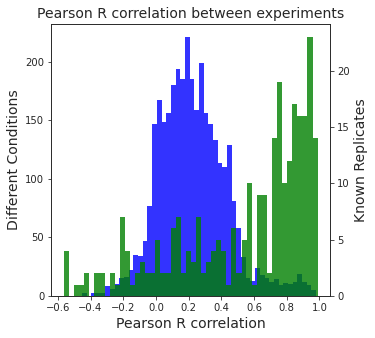

In [24]:
fig,ax = plt.subplots(figsize=(5,5))
ax2 = ax.twinx()
# ax2.hist(rep_corrs.values(),bins=50,range=(-0.2,1),alpha=0.8,color='green',linewidth=0)
# ax.hist(rand_corrs.values(),bins=50,range=(-0.2,1),alpha=0.8,color='blue',linewidth=0)
ax2.hist(rep_corrs.values(),bins=50,alpha=0.8,color='green',linewidth=0)
ax.hist(rand_corrs.values(),bins=50,alpha=0.8,color='blue',linewidth=0)
ax.set_title('Pearson R correlation between experiments',fontsize=14)
ax.set_xlabel('Pearson R correlation',fontsize=14)
ax.set_ylabel('Different Conditions',fontsize=14)
ax2.set_ylabel('Known Replicates',fontsize=14)

med_corr = np.median([v for k,v in rep_corrs.items()])
print('Median Pearson R between replicates: {:.2f}'.format(med_corr))

Remove samples without any high-correlation replicates

In [42]:
# dissimilar = []
# for idx, grp in DF_metadata_passed_step4.groupby('full_name'):
#     ident = np.identity(len(grp))
#     corrs = (DF_log_tpm[grp.index].corr() - ident).max()
#     dissimilar.extend(corrs[corrs<rcutoff].index)

# # Save this information in both the original metadata dataframe and the new metadata dataframe
# DF_metadata_all['passed_replicate_correlations'] = ~DF_metadata_all.index.isin(dissimilar)
# DF_metadata_passed_step4['passed_replicate_correlations'] = ~DF_metadata_passed_step4.index.isin(dissimilar)

In [25]:
DF_metadata_final = DF_metadata_passed_step4#[DF_metadata_passed_step4['passed_replicate_correlations']]
print('# Samples that passed replicate correlations:',len(DF_metadata_final))

# Samples that passed replicate correlations: 86


## Check that reference conditions still exist
If a reference condition was removed due to poor replicate correlations, a new reference condition needs to be defined.

Again, any samples that fail these checks will be printed below.

In [26]:
project_exprs = []
for name,group in DF_metadata_final.groupby('project'):
    
    # Get reference condition
    ref_cond = group.reference_condition.iloc[0]
    
    # Ensure the reference condition is still in the project
    if ref_cond not in group.condition.tolist():
        print('Reference condition missing from:', name)
    
    # Check that each project has at least two conditions (a reference and at least one test condition)
    if len(group.condition.unique()) <= 1:
        print('Only one condition in:', name)

If necessary, choose a new condition for failed projects and re-run notebook.

## Normalize dataset to reference conditions

In [27]:
DF_metadata_final = DF_metadata_final.set_index('sample_id')
DF_metadata_final

,exp_theme,exp_condition,sample,shortd,longd,carbon_source,oxygen_level,nitrate_level,copper_level,lanthanum_level,growth_rate,growth_mode,include?,notes,cluster_id,project,condition,reference_condition,xorder,full_name
sample_id,,,,,,,,,,,,,,,,,,,,
5GB1_FM03_TR1_QC_tpm,uMax,uMax,5GB1_FM03_TR1_QC,uMax_QC,"Fermentor run 3, uMax though close to O2 limit...",2,1,0,3,0,2,0,1,NaN,1,5G,uMax,uMax,uMax,5G:uMax
5GB1_FM20_TR3_tpm,uMax,uMax,5GB1_FM20_TR3,uMax,"Fermentor run 20, uMax",2,1,0,3,0,2,0,1,NaN,9,5G,uMax,uMax,uMax,5G:uMax
5GB1_FM20_TR3_QC_tpm,uMax,uMax,5GB1_FM20_TR3_QC,uMax_QC,"Fermentor run 20, uMax, QC",2,1,0,3,0,2,0,1,NaN,4,5G,uMax,uMax,uMax,5G:uMax
5GB1_FM20_TR3_UW_tpm,uMax,uMax,5GB1_FM20_TR3_UW,uMax,"Fermentor run 20, uMax",2,1,0,3,0,2,0,1,NaN,10,5G,uMax,uMax,uMax,5G:uMax
5GB1_FM20_TR2_QC_tpm,uMax,uMax,5GB1_FM20_TR2_QC,uMax_QC,"Fermentor run 20, uMax",2,1,0,3,0,2,0,1,NaN,3,5G,uMax,uMax,uMax,5G:uMax
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5GB1_LTrecycle_TR1_QC_tpm,LanzaTech,LanzaTech,5GB1_LTrecycle_TR1_QC,LTrecycle_QC,LanzaTech Cell recycle,-1,-1,-1,-1,-1,-1,-1,1,other exp,18,5G,LanzaTech,uMax,NaN,5G:LanzaTech
5GB1_FM_85_TR1_tpm,aa3_KO,aa3_KO,5GB1_FM_85_TR1,5GB1_FM_85,Fermentor run 85,2,1,0,3,0,2,0,1,other exp,14,5G,aa3_KO,uMax,NaN,5G:aa3_KO
5GB1_FM_85_TR2_tpm,aa3_KO,aa3_KO,5GB1_FM_85_TR2,5GB1_FM_85,Fermentor run 85,2,1,0,3,0,2,0,1,other exp,14,5G,aa3_KO,uMax,NaN,5G:aa3_KO


In [28]:
DF_log_tpm_final = DF_log_tpm[DF_metadata_final.index]
DF_log_tpm_final

,5GB1_FM03_TR1_QC_tpm,5GB1_FM20_TR3_tpm,5GB1_FM20_TR3_QC_tpm,5GB1_FM20_TR3_UW_tpm,5GB1_FM20_TR2_QC_tpm,5GB1_FM21_TR1_QC_tpm,5GB1_FM21_TR2_tpm,5GB1_FM21_TR1_tpm,5GB1_FM21_TR2_UW_tpm,5GB1_FM03_TR2_QC_tpm,...,5GB1_FM19_TR3_QC_tpm,5GB1_FM11_TR2_QC_tpm,5GB1_FM22_TR3_tpm,5GB1_FM19_TR3_tpm,5GB1_LTrecycle_TR1_tpm,5GB1_LTrecycle_TR1_QC_tpm,5GB1_FM_85_TR1_tpm,5GB1_FM_85_TR2_tpm,5GB1_pA9_red_tpm,5GB1_pA9_yellow_tpm
locus_tag,,,,,,,,,,,,,,,,,,,,,
EQU24_RS00005,-0.081618,0.019006,0.071574,0.168674,0.333361,-0.186578,-0.210041,-0.200273,-0.127457,0.013543,...,-0.566287,-0.565908,-0.841034,-0.416717,-1.074113,-0.953414,-1.062702,-0.836691,-0.423331,-0.413887
EQU24_RS00010,-0.213951,0.127314,0.222850,0.225340,0.266658,-0.255627,-0.229734,-0.073309,-0.024187,-0.115316,...,-0.266996,-0.569877,-0.753815,-0.299702,-0.218936,0.018413,-0.335309,-0.442263,-0.179590,-0.182090
EQU24_RS00015,0.002850,0.005589,0.043291,0.151171,0.109113,-0.174387,-0.141453,-0.015254,-0.012352,-0.174656,...,0.076276,-0.279816,-0.548672,-0.220953,-1.464843,-1.574489,-1.885727,-1.195060,-0.110156,0.045097
EQU24_RS00020,-0.130356,0.055352,0.097019,0.135124,0.353754,-0.164695,-0.067762,-0.145538,-0.071333,0.040745,...,-0.607341,-0.346534,-0.594828,-0.654672,0.097582,0.144122,-0.273681,-0.409585,0.082403,0.193677
EQU24_RS00025,0.659048,-0.300200,0.242581,0.128276,0.222268,-0.329130,-0.498355,-0.210850,-0.270500,0.404700,...,-0.930553,0.291903,-0.779806,-0.424201,0.012408,-0.254782,-0.665579,-0.382408,0.087352,0.059120
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
EQU24_RS22135,0.233098,-0.014794,0.036945,0.117101,0.477982,-0.304069,-0.175582,-0.161948,-0.043031,0.224448,...,-0.360556,-0.574685,-0.700540,-0.183918,-1.048823,-0.857392,-1.780896,-1.375003,-0.325961,0.050177
EQU24_RS22140,-0.176841,0.012260,0.151849,0.126502,0.324695,-0.123588,-0.036461,-0.139023,0.018003,-0.095379,...,-0.155700,-1.025606,-0.564160,-0.157108,-0.252436,-0.301201,-1.237634,-1.241028,-0.384478,-0.090839
EQU24_RS22145,0.158857,-0.040167,-0.027601,-0.015985,0.276162,-0.028069,-0.147097,-0.103168,0.006891,0.144749,...,-0.016975,-0.435052,-0.598353,0.095168,-1.406864,-1.619516,-1.841020,-1.292961,-0.572687,-0.441383


In [37]:
# project_exprs = []
# for name,group in DF_metadata_final.groupby('project'):
    
#     # Get reference condition
#     ref_cond = group.reference_condition.iloc[0]
    
#     # Get reference condition sample ids
#     ref_samples = group[group.condition == ref_cond].index
    
#     # Get reference condition expression
#     ref_expr = DF_log_tpm_final[ref_samples].mean(axis=1)
    
#     # Subtract reference expression from project
#     project_exprs.append(DF_log_tpm_final[group.index].sub(ref_expr,axis=0))

# DF_log_tpm_norm = pd.concat(project_exprs,axis=1)

## Save final datasets

In [29]:
# logTPM_qc_file = path.join('..','data','processed_data','log_tpm.csv')
# logTPM_norm_file = path.join('..','data','processed_data','log_tpm_norm.csv')
# final_metadata_file = path.join('..','data','processed_data','metadata.tsv')
# final_metadata_all_file = path.join('..','data','interim','metadata_qc_part2_all.tsv')

# DF_log_tpm_final.to_csv(logTPM_qc_file)
# DF_log_tpm_norm.to_csv(logTPM_norm_file)
# DF_metadata_final.to_csv(final_metadata_file, sep='\t')
# DF_metadata_all.to_csv(final_metadata_all_file, sep='\t')


In [34]:
DF_log_tpm.reset_index()[DF_log_tpm.reset_index()['locus_tag']=='EQU24_RS00625']

,locus_tag,5GB1_FM03_TR1_QC_tpm,5GB1_FM20_TR3_tpm,5GB1_FM20_TR3_QC_tpm,5GB1_FM20_TR3_UW_tpm,5GB1_FM20_TR2_QC_tpm,5GB1_FM21_TR1_QC_tpm,5GB1_FM21_TR2_tpm,5GB1_FM21_TR1_tpm,5GB1_FM21_TR2_UW_tpm,...,5GB1_FM19_TR3_QC_tpm,5GB1_FM11_TR2_QC_tpm,5GB1_FM22_TR3_tpm,5GB1_FM19_TR3_tpm,5GB1_LTrecycle_TR1_tpm,5GB1_LTrecycle_TR1_QC_tpm,5GB1_FM_85_TR1_tpm,5GB1_FM_85_TR2_tpm,5GB1_pA9_red_tpm,5GB1_pA9_yellow_tpm
122,EQU24_RS00625,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Ok, i didn't really do these last steps because I think I already did the normalizing to uMax. 
Do I need these random other "project" and "condition" columns later? or just here?

In [51]:
#fname = '../data/5g_processed_data/5g_log_tpm_norm_indiv.csv'
fname = '../data/5g_processed_data/5g_log_tpm_norm_indiv_lowExAdj.csv'
DF_log_tpm.to_csv(fname)

In [49]:
reload = pd.read_csv('5g_log_tpm_norm_indiv.csv')

In [50]:
reload

,locus_tag,5GB1_FM03_TR1_QC_tpm,5GB1_FM03_TR2_QC_tpm,5GB1_FM11_TR1_QC_tpm,5GB1_FM11_TR2_QC_tpm,5GB1_FM12_TR1_tpm,5GB1_FM12_TR1_QC_tpm,5GB1_FM12_TR2_tpm,5GB1_FM12_TR2_QC_tpm,5GB1_FM14_TR1_tpm,...,5GB1_pA9_red_tpm,5GB1_pA9_yellow_tpm,5GB1C-5G-La-BR1_tpm,5GB1C-5G-La-BR2_tpm,5GB1C-5G-N-BR1_tpm,5GB1C-5G-N-BR2_tpm,5GB1C-JG15-La-BR1_tpm,5GB1C-JG15-La-BR2_tpm,5GB1C-JG15-N-BR1_tpm,5GB1C-JG15-N-BR2_tpm
0,EQU24_RS00005,-0.081618,0.013543,-1.005473,-0.565908,-0.868240,-0.861181,-0.860286,-0.810841,-0.466774,...,-0.423331,-0.413887,-0.465584,-0.361508,-0.366746,-0.629039,-0.374679,-0.430905,-0.773416,-0.326023
1,EQU24_RS00010,-0.213951,-0.115316,-0.677320,-0.569877,-1.119576,-1.054664,-1.167149,-1.149678,-0.423026,...,-0.179590,-0.182090,-0.479849,-0.274384,-0.346861,-0.306024,-0.388553,-0.356148,-0.679766,-0.170025
2,EQU24_RS00015,0.002850,-0.174656,-0.639651,-0.279816,-1.029608,-1.120098,-1.028006,-0.996256,-0.586234,...,-0.110156,0.045097,-0.655508,-0.483245,-0.609796,-0.620538,-0.578460,-0.572416,-0.801799,-0.181680
3,EQU24_RS00020,-0.130356,0.040745,-0.414605,-0.346534,-0.941858,-0.957353,-0.913985,-0.980052,-0.512366,...,0.082403,0.193677,-0.363136,-0.123069,-0.244925,-0.128927,-0.032470,-0.106898,-0.295688,-0.049523
4,EQU24_RS00025,0.659048,0.404700,-0.031390,0.291903,-0.787794,-0.640604,-0.818610,-0.839456,-0.307450,...,0.087352,0.059120,-0.455537,-0.375085,-0.325837,-0.267183,-0.280655,-0.400990,-0.192058,-0.235679
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4208,EQU24_RS22135,0.233098,0.224448,-0.183783,-0.574685,-0.595432,-0.635461,-0.421307,-0.361413,-0.451241,...,-0.325961,0.050177,-2.102599,-1.773232,-2.098279,-1.530483,-2.007522,-2.169496,-2.149623,-1.858454
4209,EQU24_RS22140,-0.176841,-0.095379,-1.044380,-1.025606,-1.067681,-1.067686,-1.022445,-0.973605,-0.745638,...,-0.384478,-0.090839,-2.023112,-1.632494,-2.092212,-1.369533,-2.157892,-2.198065,-2.257044,-1.713649
4210,EQU24_RS22145,0.158857,0.144749,-0.784843,-0.435052,-0.574781,-0.535126,-0.518936,-0.496199,-0.494643,...,-0.572687,-0.441383,-2.694444,-2.569869,-2.842215,-2.911701,-3.232890,-2.884240,-3.006455,-2.753670
4211,EQU24_RS22150,-0.119272,-0.070209,-0.957250,-0.589300,-0.643860,-0.659820,-0.675180,-0.631363,-0.318578,...,-1.233437,-0.929800,-2.678648,-2.729526,-2.589713,-2.316455,-3.263189,-3.013563,-2.893263,-2.979200
